In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem setup
---------------

Our client, edugames.org, is a fictional but plausible company that is interested in creating online mathematical puzzle-solving games for seniors. They have traditionally created sudoku puzzles and other physical media, but are interested in creating a new offering for seniors in the online space. Their hope is that this new product will offer an enjoyable avenue for intellectual engagement and growth during one's professional retirement. 

The current thinking is that the game could be a mobile app as well as a web application, with a mobile first design and social media integration. They are curious if a mobile-first online game can find traction with a senior demographic. They are also curious if this may vary amongst segments of the senior population. In order to study this, they want to gain a general sense of the level of eagerness//skepticism that senior citizens hold towards online media.

Can they expect irrational exuberance or should they anticipate a cautiously optimistic audience? We can expect growth mindset to correlate with the desire to engage with an educational product. Can we find a demographic subset that demonstrates growth mindset as well as a high degree of willingness to engage with technology?

#### The Plan
---------------

We will begin by conveying the implications to the problem already explored in Pew's 2017 report on technology usage amongst seniors.

We will then conduct EDA by plotting the distributions of survey responses for senior respondents and non-senior respondents, lookomg for strong trends to gain directional insight.

We will then use the results of the cluster analysis from Pew’s initial study of the entire population to guide an unsupervised analysis of the senior population - focusing on finding distinct behavioral sub-groups. Do these vary in character or in distribution from pew's study?

This will entail an Unsupervised Analysis:
* Finding the intrinsic dimensionality of the survey responses with PCA
* Looking for sub-groups with Non-Negative Matrix Factorization of the survey response matrix.
* Looking for sub-groups with cluster analysis, beginning with K-Means and Agglomerative Clustering and projecting the results of this into 2d visualizations with t-SNE or PCA. Apply various clustering methods, then move to most promising results.
    * I will use known methods to choose the best k or neighborhood size for each clustering model.
    * I will look for consensus across a few clustering methods to validate the results. 
 
* I will then plot responses per cluster and begin looking for qualitative explanations for the clustering, focusing on those explanations most relevant to receptivity to an online game.

* I will frame the findings in terms of their relevance to the game, using verbal, numerical, and graphical arguments from evidence to explore the implications for marketing to each of these sub-groups of seniors. 

* I will summarize the findings in a concrete set of Go/No Go recommendations for marketing the product to various groups.


#### General Senior Technology Adoption Insights
---------------

This section distills insights to this problem from [Pew's Report on Senior Tech Adoption](http://www.pewinternet.org/2017/05/17/tech-adoption-climbs-among-older-adults/). See the report for greater detail on the insights below.


According to Pew's Report,

##### Seniors make up a substantial and growing portion of the population.
* Seniors (65+) make up 15% of the population- about 46 million people.
* The share of seniors is projected to increase to 22% by 2025.

##### Tech adoption for seniors is growing in step with the general population, especially for younger, wealthier, and college educated seniors.
* Growth in internet, broadband, smartphone, tablet, and social media adoption amongst seniors closely mirrors the high rate of growth in the general population.
* The total rate of adoption of these technologies varies from about 1/2 to 2/3 that of the general population.
* Younger, wealthier, and college educated seniors show higher rates of tech adoption in terms of internet, broadband, smartphone, tablet, and social media adoption. 
* 40% of seniors own smart phones
* 25% of seniors play online games.

##### Seniors who adopt internet and device usage have high levels of engagement.
* 75% of internet using seniors go online daily.
* 76% of smart-phone owning seniors use the internet multiple times per day.


The report on Senior Tech Adoption uses data from the survey on information engagedness and warniness as well as two additional surveys- a 2016 survey on senior confidence in independent device usage and a 2015 survey on frequency of internet usage [Methodology and Data Sources](http://www.pewinternet.org/2017/05/17/older-americans-tech-methodology/).

[Another useful study on video games](http://www.pewinternet.org/2015/12/15/attitudes-about-video-games/)

#### Exploratory Data Analysis of Information Engagement/Wariness Survey
---------------

In [14]:
data = pd.read_csv("data/September 29 - November 6, 2016 - Information engaged wary - CSV.csv")

In [20]:
data.head()

,psraid,sample,int_date,lang,comp,version,form,qs1,live1,q1a,...,hh3,ql1a,qc1,fips,usr,cregion,state,density,weight,standwt
0,100003,1,92916,1,1,1,1,,4,1,...,2,,,34029,S,1,34,4,2.235294,0.786190
1,100005,1,92916,1,1,1,2,,1,1,...,,,,36061,U,1,36,5,1.029412,0.362061
2,100008,1,92916,1,1,1,2,,4,3,...,,,,42039,R,1,42,1,3.029412,1.065495
3,100015,1,92916,1,1,1,2,,3,2,...,2,,,12057,U,3,12,4,2.617647,0.920670
4,100018,1,92916,1,1,1,1,,3,2,...,2,1,,34029,S,1,34,4,4.941176,1.737894


In [18]:
data.columns

Index(['psraid', 'sample', 'int_date', 'lang', 'comp', 'version', 'form',
       'qs1', 'live1', 'q1a',
       ...
       'hh3', 'ql1a', 'qc1', 'fips', 'usr', 'cregion', 'state', 'density',
       'weight', 'standwt'],
      dtype='object', length=117)

In [16]:
data.isnull().any().any()

False

What columns subset age? What do columns mean?

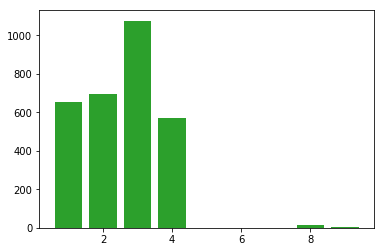

In [53]:
grp = data.groupby(by='live1')['sample'].count()
plt.bar(grp.index,grp.values)
plt.show()